<a href="https://colab.research.google.com/github/Seongjin1225/BigData/blob/main/%EC%9D%B8%EA%B5%AC%EB%B0%B1%EB%A7%8C%EB%AA%85%EB%8B%B9_%EC%9D%91%EA%B8%89%EC%9D%98%EB%A3%8C%EA%B8%B0%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    # 한글폰트깨짐 방지(실행 후 런타임 다시 시작 필요!)
# plt.rcParams['font.family'] = 'NanumGothic'
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and direc

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import folium

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BigData/인구 백만 명당 응급의료기관 - 시도별, 연도별.xlsx')
df = df.drop(df.index[[0,1,2,3,21]])
df

pop = df[['분류','2023년.5','2022년.5','2021년.5','2020년.5',
          '2019년.5','2018년.5','2017년.5','2016년.5']]

pop.columns = ['분류','2023년','2022년','2021년','2020년','2019년','2018년','2017년','2016년']
pop.set_index('분류',inplace=True)
pop = pop.astype(float)

pop

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2023년,2022년,2021년,2020년,2019년,2018년,2017년,2016년
분류,,,,,,,,
서울,5.2,5.3,5.3,5.2,5.1,5.0,5.3,5.1
부산,8.5,8.4,8.4,8.3,8.2,8.4,8.9,9.1
대구,8.0,7.6,6.7,6.6,6.2,4.9,6.1,6.0
인천,7.0,6.7,6.4,6.1,6.8,6.8,7.1,6.5
광주,14.8,14.0,13.9,13.8,13.7,13.7,14.3,14.3
대전,6.2,6.2,6.9,6.8,6.8,6.7,6.7,6.6
울산,6.3,6.3,6.2,6.2,7.0,7.8,8.6,7.7
세종,5.2,5.2,5.4,5.6,2.9,0.0,3.6,4.1
경기,5.4,5.4,4.9,4.9,4.9,4.9,5.0,4.9


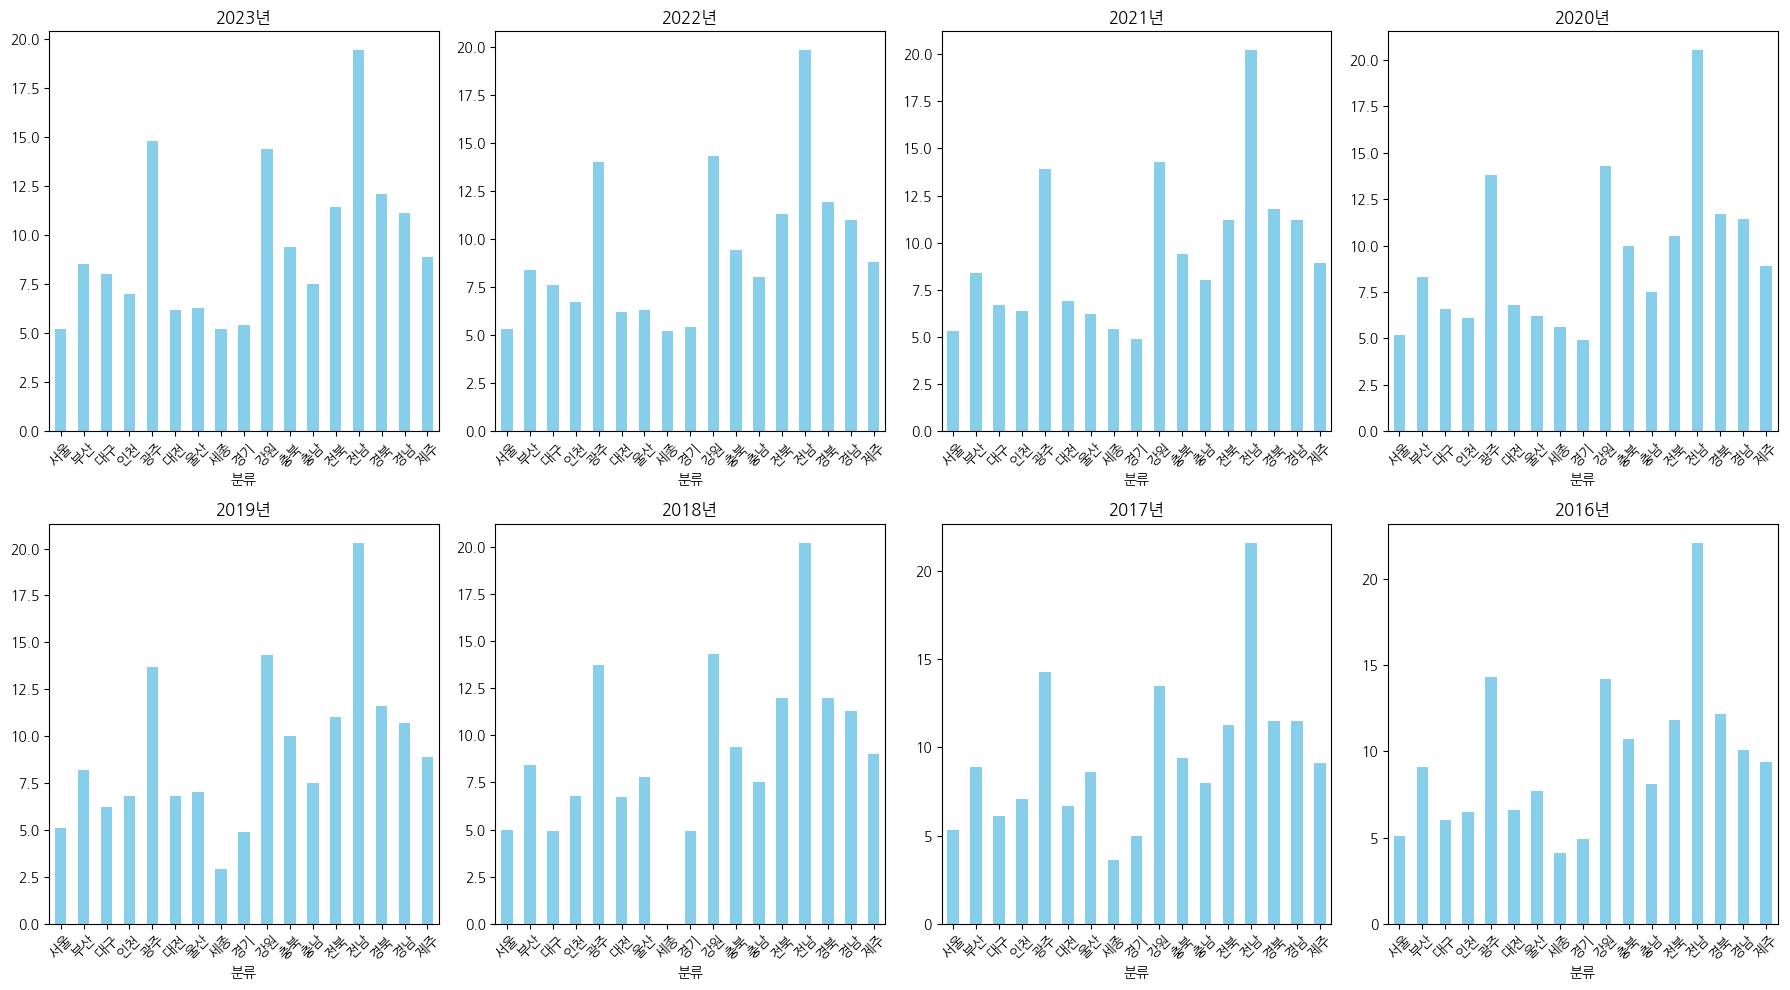

In [ ]:
plt.figure(figsize=(18,10))

for idx, year in enumerate(pop.columns):
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.subplot(2, 4, idx + 1)  # 2행 4열로 나누어 그래프 위치 설정
    pop[year].plot(kind='bar', title=f'{year}', color='skyblue', ax=plt.gca())
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [ ]:
# 서울만 따로 빼서 분리
# .4 - > 전체 인구 수
# .5 -> 백만명당 기관수
df


,분류,2023년.5,2022년.5,2021년.5,2020년.5,2019년.5,2018년.5,2017년.5,2016년.5
4,서울,5.2,5.3,5.3,5.2,5.1,5,5.3,5.1


In [ ]:
d = pd.read_excel('/content/drive/MyDrive/BigData/인구 백만 명당 응급의료기관 - 시도별, 연도별.xlsx')
d

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,No,분류,2023년,2023년.1,2023년.2,2023년.3,2023년.4,2023년.5,2022년,2022년.1,...,2017년.2,2017년.3,2017년.4,2017년.5,2016년,2016년.1,2016년.2,2016년.3,2016년.4,2016년.5
0,No,분류,계,권역응급의료센터,지역응급의료센터,지역응급의료기관,전체인구수,인구 백만명당 기관 수,계,권역응급의료센터,...,지역응급의료센터,지역응급의료기관,전체인구수,인구 백만명당 기관 수,계,권역응급의료센터,지역응급의료센터,지역응급의료기관,전체인구수,인구 백만명당 기관 수
1,No,분류,개소,개소,개소,개소,명,개소,개소,개소,...,개소,개소,명,개소,개소,개소,개소,개소,명,개소
2,No,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,전체,411,42,137,232,"51,325,329",8,410,40,...,119,261,"51,778,544",8,413,31,120,262,"51,696,216",8
4,2,서울,49,7,24,18,"9,386,034",5.2,50,7,...,27,20,"9,857,426",5.3,51,4,27,20,"9,930,616",5.1
5,3,부산,28,1,8,19,"3,293,362",8.5,28,1,...,6,23,"3,470,653",8.9,32,1,7,24,"3,498,529",9.1
6,4,대구,19,2,4,13,"2,374,960",8,18,2,...,5,9,"2,475,231",6.1,15,1,5,9,"2,484,557",6
7,5,인천,21,2,9,10,"2,997,410",7,20,2,...,7,12,"2,948,542",7.1,19,2,6,11,"2,943,069",6.5
8,6,광주,21,2,4,15,"1,419,237",14.8,20,2,...,4,15,"1,463,770",14.3,21,2,4,15,"1,469,214",14.3
9,7,대전,9,2,4,3,"1,442,216",6.2,9,2,...,3,5,"1,502,227",6.7,10,2,3,5,"1,514,370",6.6
